# A, the, and, or

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('seaborn-muted')
sns.set(style="whitegrid")

%matplotlib inline

In [2]:
import bz2
import ujson
import attr
import os
import math
import itertools

import pandas as pd
import numpy as np

from scipy.stats import kurtosis as sp_kurtosis, skew as sp_skew
from numpy import std as np_std
from glob import glob
from collections import Counter, UserDict
from itertools import islice, product
from tqdm import tqdm_notebook

In [3]:
@attr.s
class Dataset:
    
    root = attr.ib()
    
    def paths(self):
        return glob(os.path.join(self.root, '*.bz2'))
    
    def novels(self):
        for path in tqdm_notebook(self.paths()):
            with bz2.open(path) as fh:
                for line in fh:
                    yield ujson.loads(line)

In [4]:
ds = Dataset('data/a-the-and-or.json')

In [5]:
rows = []
for novel in ds.novels():
    for token, counts in novel['counts'].items():
        
        total = sum(counts)
        
        if total == 0:
            continue
        
        for bin, count in enumerate(counts):
            rows.append((token, bin, count/total))

tokens = ['a', 'the', 'and', 'or']
moment_data = {token: {bin_: [] for bin_ in range(20)} for token in tokens}
for r in rows:
    token, bin_, pct = r
    moment_data[token][bin_].append(pct)

moment_funcs = {'std': np_std, 
                'skew': sp_skew, 
                'kurtosis': sp_kurtosis}
moments = {(token, moment): {} for token, moment in product(tokens, moment_funcs)}
moments2 = {'token': [], 'moment': [], 'value': [], 'bin': []}
for token, bin_, moment in product(tokens, range(20), moment_funcs):
    d = moment_data[token][bin_]
    moment_val = moment_funcs[moment](d)
    moments[(token, moment)][bin_] = moment_val
    moments2['token'].append(token)
    moments2['moment'].append(moment)
    moments2['value'].append(moment_val)
    moments2['bin'].append(bin_)
moments = pd.DataFrame(moments)
moments2 = pd.DataFrame(moments2)

In [6]:
bc = pd.DataFrame(rows, columns=('token', 'bin', 'pct'))

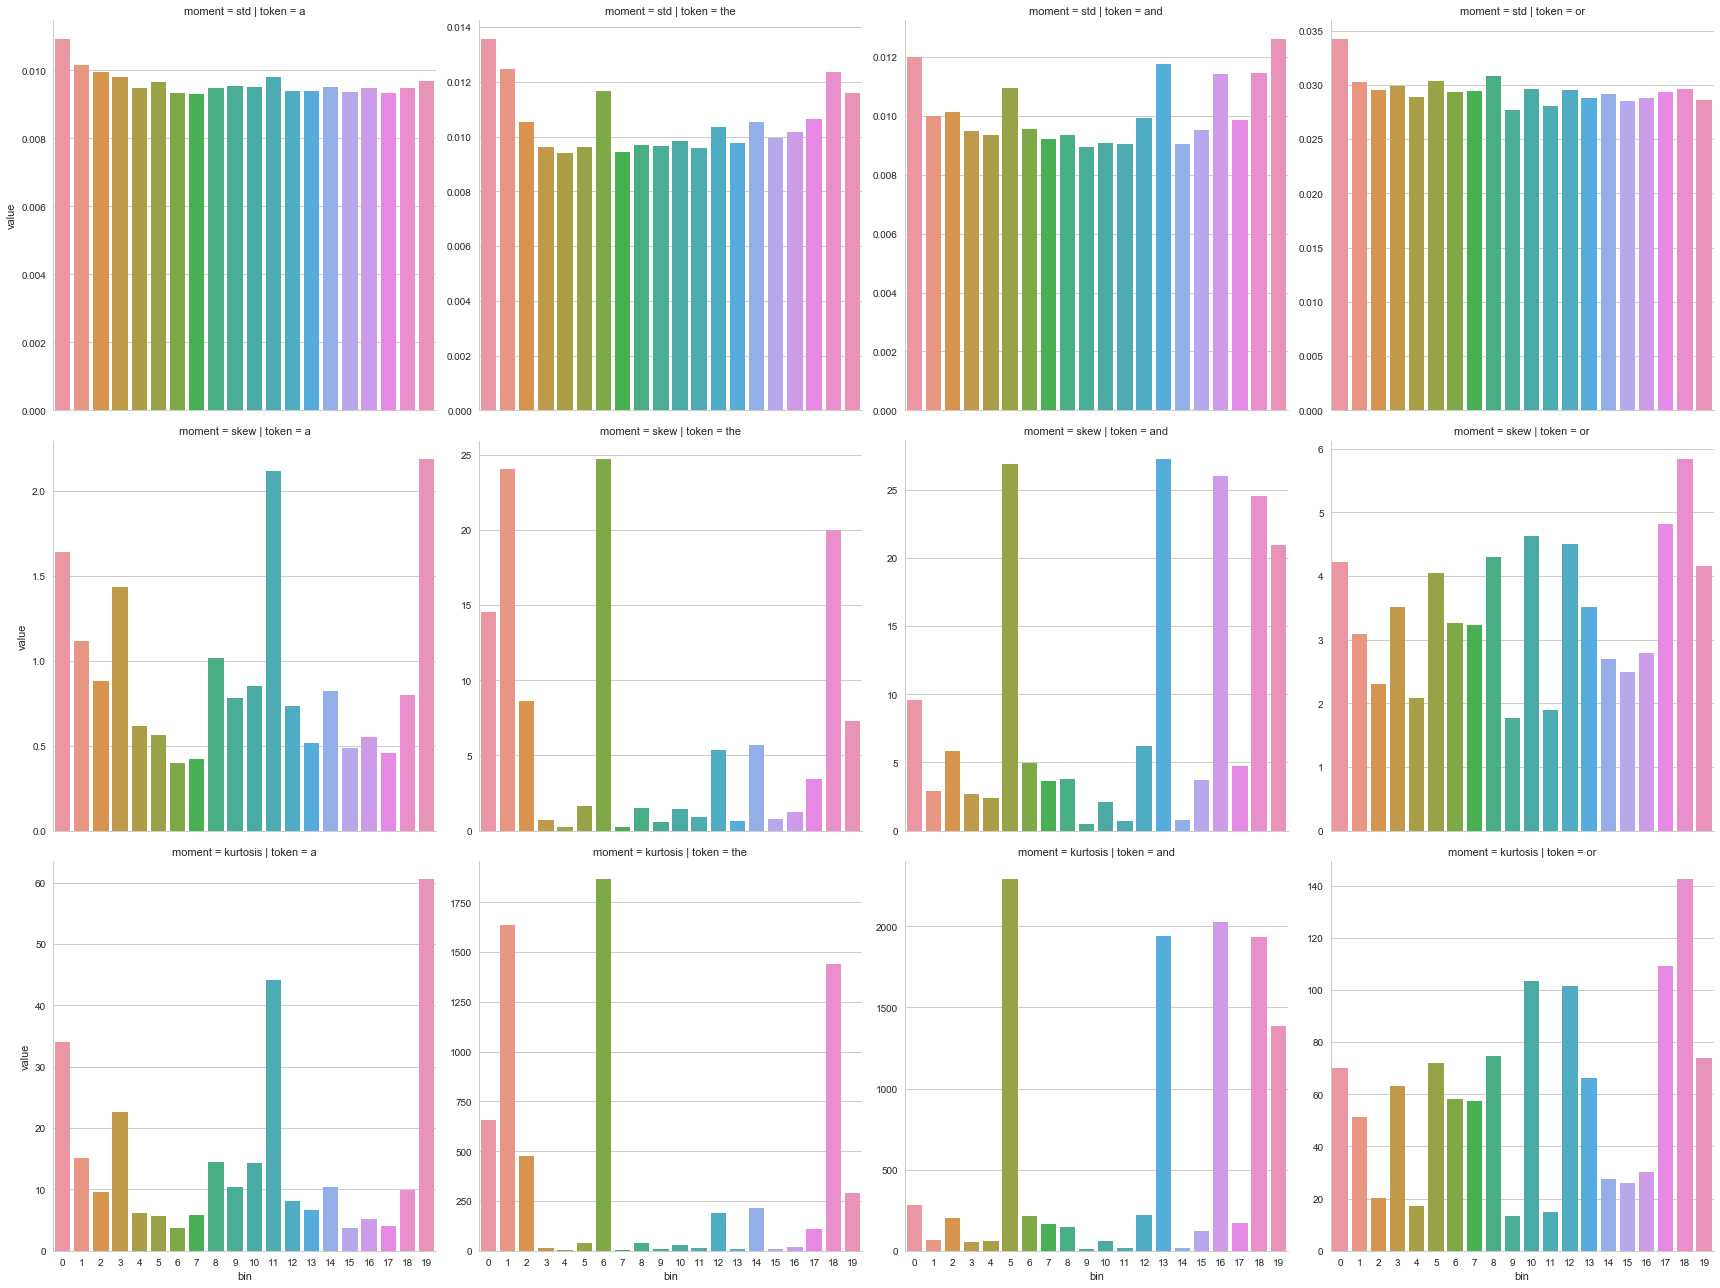

In [7]:
g = sns.factorplot(x='bin', y='value', 
                   row='moment', col='token',
                   sharey=False, kind='bar',
                   size=6,
                   data=moments2)
g.savefig('output.png')

# a

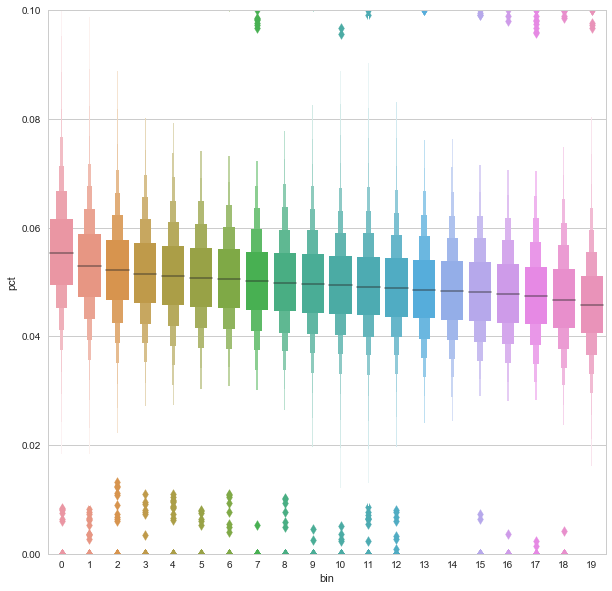

In [8]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.1)

sns.lvplot(data=bc[bc['token']=='a'], x='bin', y='pct')

# the

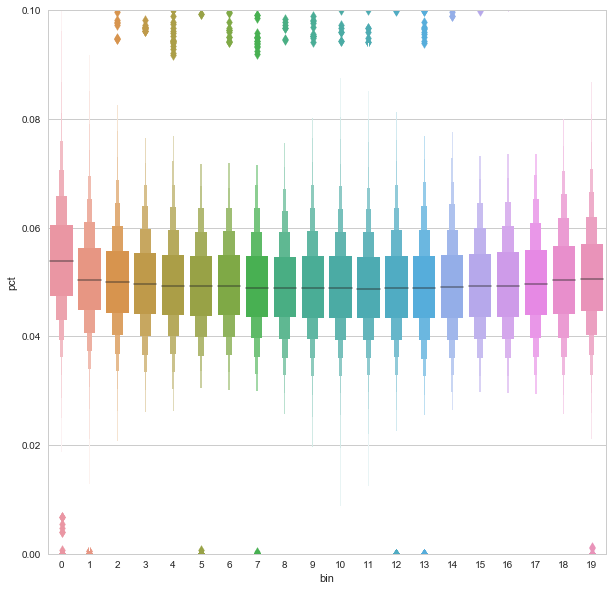

In [9]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.1)

sns.lvplot(data=bc[bc['token']=='the'], x='bin', y='pct')

# and

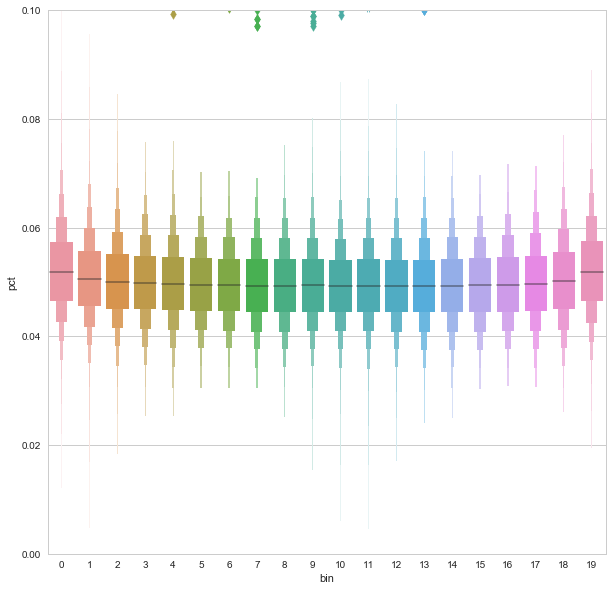

In [10]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.1)

sns.lvplot(data=bc[bc['token']=='and'], x='bin', y='pct')

# or

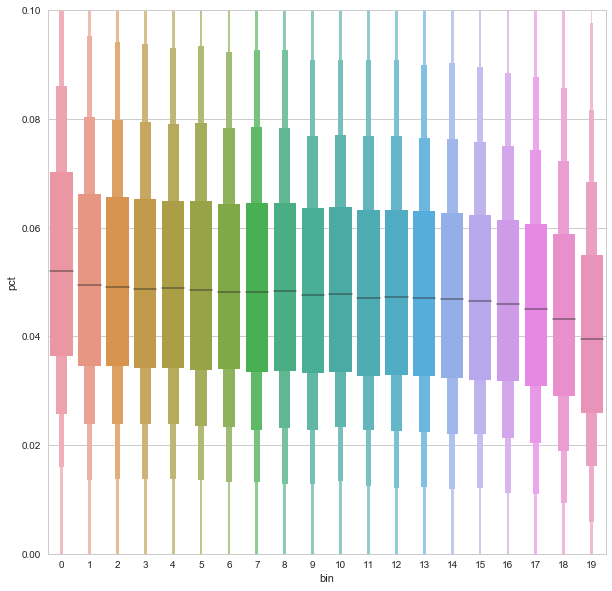

In [11]:
plt.figure(figsize=(10, 10))
plt.ylim(0, 0.1)

sns.lvplot(data=bc[bc['token']=='or'], x='bin', y='pct')